In [1]:
import lhapdf
#import ROOT
import math
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.rcParams['text.usetex'] = True
## Getting a PDF member object
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq18 = lhapdf.mkPDF("CT18qed",0)
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_PDF = lhapdf.mkPDF("JAM20-SIDIS_PDF_proton_nlo", 0)
#JAM21_PDF = lhapdf.mkPDF("JAM21PionPDFnlo", 0)

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/CT18qed/CT18qed_0000.dat
CT18qed PDF set, member #0, version 1
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_PDF_proton_nlo/JAM20-SIDIS_PDF_proton_nlo_0000.dat
JAM20-SIDIS_PDF_proton_nlo PDF set, member #0, version 2


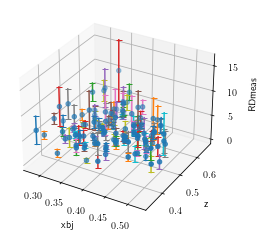

In [2]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
df = pd.read_csv("results/csv.csv")
xs = df[df['Q2']==4]['xbj_corr']
zs = df[df['Q2']==4]['z_corr']
RDs = df[df['Q2']==4]['y_RD']
RD_err = df[df['Q2']==4]['error_RD']
#ax.errorbar(xs,zs,RDs,RD_err,marker = "_")
for i in range(0,len(xs)):
    xbj_corr = xs[i]
    z_corr = zs[i]
    RD = RDs[i]
    RD_error = RD_err[i]
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")
plt.show()
#plt.savefig("RD_xbj_z")

In [3]:
#df[df['Q2'] == 4.75].head()
df.describe()

,Q2,Q2_corr,xbj,xbj_corr,z,z_corr,RunGroup,y_RD,error_RD,y_RD_rho,...,yield_neg_incnorad,yield_neg_incrad,yield_pos_incnorad,yield_pos_incrad,W2_corr,Wp2_corr,xprime_corr,zprime_corr,shms_p,shms_dp
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,...,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,4.696281,4.363970,0.447727,0.448100,0.463705,0.463773,305.261708,5.277075,1.393154,4.665107,...,14.129220,12.528502,22.294549,20.109466,6.296590,3.636904,0.408712,0.424418,2.413668,3.015434
std,0.598000,0.704317,0.074608,0.070023,0.070685,0.066604,141.780803,1.813912,0.986337,1.634502,...,12.148427,10.928859,18.786446,17.187449,0.977955,0.685705,0.104515,0.107553,0.387010,9.643581
min,4.000000,3.072320,0.275000,0.278487,0.325000,0.333986,90.000000,0.061336,0.276949,0.046891,...,0.203569,0.181304,0.317505,0.286971,4.369330,2.825720,-0.000000,-0.000000,1.577690,-9.860710
25%,4.000000,3.844210,0.375000,0.389336,0.425000,0.423211,180.000000,4.172695,0.725846,3.606670,...,5.415620,4.588970,8.616180,7.627000,5.598240,3.067705,0.368889,0.402558,2.127660,-5.666040
50%,4.750000,4.432650,0.425000,0.440975,0.475000,0.470719,290.000000,5.067410,1.053430,4.514390,...,9.548760,8.636500,15.281100,13.680300,6.165530,3.470230,0.415302,0.445339,2.457350,0.146394
75%,5.500000,4.882745,0.525000,0.510757,0.525000,0.519711,440.000000,6.296605,1.683730,5.611530,...,19.102950,16.581150,29.996350,27.153300,6.814265,4.055780,0.458862,0.491544,2.711565,11.179250
max,5.500000,6.060700,0.625000,0.612865,0.675000,0.659579,550.000000,9.892920,6.294660,9.068850,...,64.027800,59.052000,96.219500,93.434200,9.623580,6.521520,0.545935,0.640100,3.762660,24.401200


In [4]:
#CSVS_results = []
pdf_sets = []
i_FF = 2
FF_model = ["fDSSLO","fDSSNLO","JAM20","hknsff07_LO","hknsff07_NLO"]
i_PDF = 1
PDF_model = ["cteq6l1","JAM20","cteq18qed"]
i_assumption = '7ass_rho'

In [5]:
#here the third and fourth inits are switched
#inits=(0,0)
#three input
#inits = (1,-1,1)
#inits = (0.31621375387783907,0.9655536623222454,2.2,1.4)
#inits = (0.31621375387783907,0.9655536623222454,4,0.2)
inits = (0.31621375387783907,0.9655536623222454,1.8,-0.2,-1)
#inits = (0.31621375387783907,1.0602531294347466,0.60029420012617,0.5690151479308769)
#four input
#4
#inits=(0.5837438039662431,-1.1844700435399933,1.6742194710533476,0)
#4.75
#inits=(0.5487693365000776,-1.0881946339773718,1.594995464377801,0)
#5.5
#inits=(0.38322380904636766,-0.47844410509432217,1.115729075281362,0)
a_rho = -1.6
#rho_file = open("rho_sub_kai2.txt","a")
#rho_file.write("\n")
#rho_file.write(str(a_rho))
#rho_file.write(" ")

In [6]:
from iminuit import Minuit
import scipy.integrate as integrate
import scipy.special as sc
import sys
sys.path.insert(1,'DSS')
import fDSS_
sys.path.insert(1,'hkns07fflib-v1_2')
import hknsff07_
def Deltaz_param(z_had,alpha,beta):
    delta_z = z_had**alpha*(1-z_had)**beta
    return delta_z
def Dz_param(z_had,alpha,beta):
    delta_z = z_had**alpha*(1-z_had)**beta
    return (1-delta_z)/(1+delta_z)
    #return params[0]+params[1]*z_had+params[2]*z_had**2+params[3]*z_had**3
def CSVx_param(xbj,a,b):
    #a = -0.5 
    c = sc.beta(b+2,a+1)/sc.beta(b+1,a+1)
    CSVx = (1-xbj)**a*xbj**b*(xbj-c)
    #CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)
    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    return CSVx
    #return params[len(params)-1]
def Bxz_param(Q,z_had,xbj,i_pdf,i_ff):
    duplus = 0
    duminus = 0
    dsplus = 0
    dsminus = 0
    delta_z = 0
    if i_ff==0:
        duplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[0]
        dsplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[4]
        dsminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[4]
        delta_z = duminus/duplus 
    elif i_ff==1:
        duplus = fDSS_.fdss(1,1,1,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,1,z_hadron,Q*Q)[0]
        dsplus = fDSS_.fdss(1,1,1,z_hadron,Q*Q)[4]
        dsminus = fDSS_.fdss(1,-1,1,z_hadron,Q*Q)[4]
        delta_z = duminus/duplus
        #return (1-delta_z)/(1+delta_z)
    elif i_ff==2:
        duplus = JAM20.xfxQ(2,z_had,Q)
        duminus = JAM20.xfxQ(-2,z_had,Q)
        dsplus = JAM20.xfxQ(3,z_had,Q)
        dsminus = JAM20.xfxQ(-3,z_had,Q)
        delta_z = duminus/duplus
    elif i_ff==3:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,1,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,1,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
    elif i_ff==4:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,2,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,2,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
    ubar = 0
    dbar = 0
    uv = 0
    dv = 0
    strange = 0
    sbar = 0
    if i_pdf == 0:
        ubar = p_cteq6.xfxQ(-2,xbj,Q)
        dbar = p_cteq6.xfxQ(-1,xbj,Q)
        uv = p_cteq6.xfxQ(2,xbj,Q)-ubar
        dv = p_cteq6.xfxQ(1,xbj,Q)-dbar
        strange = p_cteq6.xfxQ(3,xbj,Q)
        sbar = p_cteq6.xfxQ(-3,xbj,Q)
    elif i_pdf == 1:
        ubar = JAM20_PDF.xfxQ(-2,xbj,Q)
        dbar = JAM20_PDF.xfxQ(-1,xbj,Q)
        uv = JAM20_PDF.xfxQ(2,xbj,Q)-ubar
        dv = JAM20_PDF.xfxQ(1,xbj,Q)-dbar
        strange = JAM20_PDF.xfxQ(3,xbj,Q)
        sbar = JAM20_PDF.xfxQ(-3,xbj,Q)
    elif i_pdf == 2:
        ubar = p_cteq18.xfxQ(-2,xbj,Q)
        dbar = p_cteq18.xfxQ(-1,xbj,Q)
        uv = p_cteq18.xfxQ(2,xbj,Q)-ubar
        dv = p_cteq18.xfxQ(1,xbj,Q)-dbar
        strange = p_cteq18.xfxQ(3,xbj,Q)
        sbar = p_cteq18.xfxQ(-3,xbj,Q)
    B_NS = 5*(ubar+dbar)/(uv+dv)
    B_sz = (dsplus+dsminus)/duplus/(1+delta_z) 
    B_S = B_sz*(strange+sbar)/(uv+dv)
    return 5/2+B_NS+B_S
def Ax_param(Q,xbj,i_pdf):
    uv = 0
    dv = 0
    if i_pdf == 0:
        uv = p_cteq6.xfxQ(2,xbj,Q)-p_cteq6.xfxQ(-2,xbj,Q)
        dv = p_cteq6.xfxQ(1,xbj,Q)-p_cteq6.xfxQ(-1,xbj,Q)
    elif i_pdf == 1:
        uv = JAM20_PDF.xfxQ(2,xbj,Q)-JAM20_PDF.xfxQ(-2,xbj,Q)
        dv = JAM20_PDF.xfxQ(1,xbj,Q)-JAM20_PDF.xfxQ(-1,xbj,Q)
    elif i_pdf ==2:
        uv = p_cteq18.xfxQ(2,xbj,Q)-p_cteq18.xfxQ(-2,xbj,Q)
        dv = p_cteq18.xfxQ(1,xbj,Q)-p_cteq18.xfxQ(-1,xbj,Q)
    return -4/(3*(uv+dv))
def dRDmeas_rho(neg_D2_yield,pos_D2_yield,neg_rho_yield,a):
    neg_yield = neg_D2_yield+a*neg_rho_yield
    pos_yield = pos_D2_yield+a*neg_rho_yield
    RY = neg_D2_yield/pos_D2_yield
    RY_rho = neg_yield/pos_yield
    RD = (4*RY-1)/(1-RY)
    RD_rho = (4*RY_rho-1)/(1-RY_rho)
    return RD-RD_rho
def RDmeas_CSV(Q,z_had,xbj,neg_D2_yield,pos_D2_yield,neg_rho_yield,alpha,beta,a,b,gamma,i_pdf,i_ff):
    
    Dz = Dz_param(z_had,alpha,beta)
    CSVx = CSVx_param(xbj,a,b)
    
    Bx = Bxz_param(Q,z_had,xbj,i_pdf,i_ff)
    Ax = Ax_param(Q,xbj,i_pdf)
    dRD_rho = dRDmeas_rho(neg_D2_yield,pos_D2_yield,neg_rho_yield,gamma)
    return (Bx-Ax*CSVx)/Dz-2.5+dRD_rho


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/3608236254.py:46: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_1stQ2.migrad()


0.3029729475151216 1.123436924448371 1.9664198791584842 -0.08446352629817049 -0.9877312305707553
200.46996633330704
0.3029729475151216


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/3608236254.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/3608236254.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/3608236254.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/3608236254.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.appe

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/3608236254.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/3608236254.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/3608236254.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/3608236254.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.appe

'\n#x = np.array(xs)\n#y = np.array(zs)\nfit_RDmeas=[]\nfor xbj in xbj_fit:\n    fit_RDmeas_zi = []\n    for zi in zhad_fit:\n        #fit_RDmeas_zi.append()\n        fit_RDmeas.append(RDmeas_CSV(Q,zi,xi,neg_D2_yield[i],pos_D2_yield[i],neg_D2_rho[i],alpha,beta,a,b,gamma,i_PDF,i_FF)))\n           \nX,Y = np.meshgrid(xbj_fit,zhad_fit)\nZ = np.reshape(fit_RDmeas,X.shape)\nax.plot_surface(X,Y,Z)\n#ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)\n#plt.plot(zs,fit_RDmeas,label = "fit")\n#print(xs) \n#print(zs)\nfit_info = [\n    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_1stQ2.fval:.1f} / {len(zs) - m_1stQ2.nfit}",\n]\nprint(fit_info)\nfor p, v, e in zip(m_1stQ2.parameters, m_1stQ2.values, m_1stQ2.errors):\n    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")\nplt.legend(title="\n".join(fit_info))\n\n     \nplt.show()\n#print(str(m_1stQ2.fval))\n#rho_file.write(str(m_1stQ2.fval))\n#rho_file.write(" ")\n'

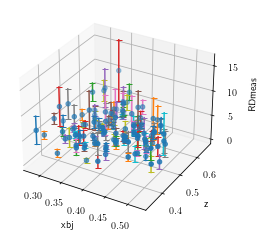

In [7]:

Q2 = 4
Q = math.sqrt(4)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
xs = []
zs = []
RDs = []
for i,row in df[df['Q2']==Q2].iterrows():
    xbj_corr = row['xbj_corr']
    xs.append(xbj_corr)
    #print(xbj_corr)
    z_corr = row['z_corr']
    zs.append(z_corr)
    RD = row['y_RD']
    RDs.append(RD)
    RD_error = row['error_RD']
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")

def least_squares_1stQ2(alpha,beta,a,b,gamma):
    least_square = 0
    for i,row in df[df['Q2']==Q2].iterrows():
        Q2corr = row['Q2_corr']
        xbj = row['xbj_corr']
        zhad = row['z_corr']
        RD = row['y_RD']
        RD_err = row['error_RD']
        neg_D2_yield = row['yield_neg']
        pos_D2_yield = row['yield_pos']
        neg_D2_rho = row['yield_neg_rho']
        Qcorr = math.sqrt(Q2corr)
    
        least_square+=((RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF)))**2/(RD_err)**2
    return least_square
   
    
m_1stQ2 = Minuit(least_squares_1stQ2,alpha = inits[0],beta = inits[1],a = inits[2],b = inits[3],gamma = inits[4])
m_1stQ2.limits['gamma'] = (-2, -0.5)
m_1stQ2.limits['alpha'] = (0,1)
m_1stQ2.limits['beta'] = (0,2)
#m_1stQ2.limits['a'] = (-2,0)
#m_1stQ2.limits['b'] = (0,4)
m_1stQ2.migrad()
m_1stQ2.hesse()
print(*m_1stQ2.values)
print(m_1stQ2.fval)

alpha = m_1stQ2.values[0]
print(alpha)

dfArhoout = pd.DataFrame()
for i,row in df[df['Q2']==Q2].iterrows():
    Q2corr = row['Q2_corr']
    xbj = row['xbj_corr']
    zhad = row['z_corr']
    RD = row['y_RD']
    RD_err = row['error_RD']
    neg_D2_yield = row['yield_neg']
    pos_D2_yield = row['yield_pos']
    neg_D2_rho = row['yield_neg_rho']
    Qcorr = math.sqrt(Q2corr)
    #residual = RD/RD_err
    residual = (RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,m_1stQ2.values[0],m_1stQ2.values[1],m_1stQ2.values[2],m_1stQ2.values[3],m_1stQ2.values[4],i_PDF,i_FF))/RD_err
    #(RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF))/RD_err
    #print(residual)
    row['Residual_Arho']=(residual)
    dfArhoout = dfArhoout.append(row)
    #print(row)
    #dfArhoout=pd.concat([dfArhoout,row],ignore_index = True,axis = 1)
    #df = pd.concat([df, df2], ignore_index = True, axis = 0)
dfArhoout.head()

xbj_fit = np.arange(0.25,0.7,0.01)
zhad_fit = np.arange(0.3,0.75,0.01)
'''
#x = np.array(xs)
#y = np.array(zs)
fit_RDmeas=[]
for xbj in xbj_fit:
    fit_RDmeas_zi = []
    for zi in zhad_fit:
        #fit_RDmeas_zi.append()
        fit_RDmeas.append(RDmeas_CSV(Q,zi,xi,neg_D2_yield[i],pos_D2_yield[i],neg_D2_rho[i],alpha,beta,a,b,gamma,i_PDF,i_FF)))
           
X,Y = np.meshgrid(xbj_fit,zhad_fit)
Z = np.reshape(fit_RDmeas,X.shape)
ax.plot_surface(X,Y,Z)
#ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)
#plt.plot(zs,fit_RDmeas,label = "fit")
#print(xs) 
#print(zs)
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_1stQ2.fval:.1f} / {len(zs) - m_1stQ2.nfit}",
]
print(fit_info)
for p, v, e in zip(m_1stQ2.parameters, m_1stQ2.values, m_1stQ2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))

     
plt.show()
#print(str(m_1stQ2.fval))
#rho_file.write(str(m_1stQ2.fval))
#rho_file.write(" ")
'''

In [8]:
print(dfArhoout.head())

    Q2  Q2_corr    xbj  xbj_corr      z    z_corr  RunGroup     y_RD  \
0  4.0  3.37275  0.275  0.278487  0.325  0.344239     100.0  6.56366   
1  4.0  3.37644  0.275  0.282134  0.375  0.373989     100.0  4.70246   
2  4.0  3.78996  0.325  0.324579  0.375  0.376585     100.0  6.39900   
3  4.0  4.20543  0.375  0.371190  0.375  0.380968     100.0  6.59966   
4  4.0  4.59366  0.425  0.418406  0.375  0.386491     100.0  4.00958   

   error_RD  y_RD_rho  ...  yield_neg_incrad  yield_pos_incnorad  \
0  2.838890   5.91386  ...           22.7048             34.2880   
1  0.734059   4.38102  ...           34.3846             52.8819   
2  0.856208   5.96019  ...           59.0520             96.2195   
3  1.179900   6.30057  ...           39.8480             67.4365   
4  1.157810   3.71265  ...           13.6858             24.4867   

   yield_pos_incrad  W2_corr  Wp2_corr  xprime_corr  zprime_corr   shms_p  \
0           33.6179  9.62358   6.52152     0.273047     0.337436  2.22258   
1   

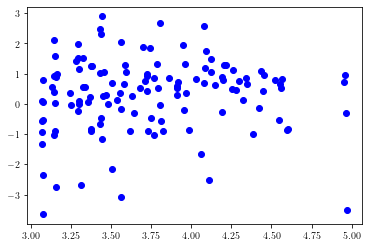

In [9]:
plt.plot(dfArhoout['Q2_corr'],dfArhoout['Residual_Arho'],'bo')

In [10]:
m_1stQ2.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,alpha,0.30,0.08,,,0,1,
1,beta,1.1,0.5,,,0,2,
2,a,2.0,3.3,,,,,
3,b,-0.1,3.5,,,,,
4,gamma,-0.99,0.09,,,-2,-0.5,


In [11]:
for p in m_1stQ2.params:
    print(repr(p))

Param(number=0, name='alpha', value=0.3029729475151216, error=0.0821784286312964, merror=None, is_const=False, is_fixed=False, lower_limit=0.0, upper_limit=1.0)
Param(number=1, name='beta', value=1.123436924448371, error=0.4749388249290445, merror=None, is_const=False, is_fixed=False, lower_limit=0.0, upper_limit=2.0)
Param(number=2, name='a', value=1.9664198791584842, error=3.252714043957704, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None)
Param(number=3, name='b', value=-0.08446352629817049, error=3.514768939348486, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None)
Param(number=4, name='gamma', value=-0.9877312305707553, error=0.08608700807427194, merror=None, is_const=False, is_fixed=False, lower_limit=-2.0, upper_limit=-0.5)


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/2042229066.py:48: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_2ndQ2.migrad()


0.4556057203463463 1.9999895784373427 1.7058444293460462 -1.2924220839585243 -1.288321647571042
188.7421310308056
0.4556057203463463


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/2042229066.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/2042229066.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/2042229066.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/2042229066.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.appe

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/2042229066.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/2042229066.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/2042229066.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/2042229066.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.appe

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/2042229066.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)


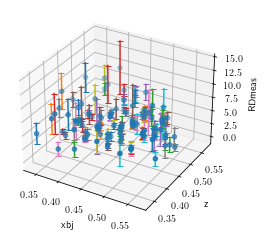

In [12]:
Q2 = 4.75

Q = math.sqrt(Q2)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
xs = []
zs = []
RDs = []

for i,row in df[df['Q2']==Q2].iterrows():
    xbj_corr = row['xbj_corr']
    xs.append(xbj_corr)
    #print(xbj_corr)
    z_corr = row['z_corr']
    zs.append(z_corr)
    RD = row['y_RD']
    RDs.append(RD)
    RD_error = row['error_RD']
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")

def least_squares_2ndQ2(alpha,beta,a,b,gamma):
    least_square = 0
    for i,row in df[df['Q2']==Q2].iterrows():
        Q2corr = row['Q2_corr']
        xbj = row['xbj_corr']
        zhad = row['z_corr']
        RD = row['y_RD']
        RD_err = row['error_RD']
        neg_D2_yield = row['yield_neg']
        pos_D2_yield = row['yield_pos']
        neg_D2_rho = row['yield_neg_rho']
        Qcorr = math.sqrt(Q2corr)
    
        least_square+=((RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF)))**2/(RD_err)**2
    return least_square
   
    
m_2ndQ2 = Minuit(least_squares_2ndQ2,alpha = inits[0],beta = inits[1],a = inits[2],b = inits[3],gamma = inits[4])
m_2ndQ2.limits['gamma'] = (-2, -0.5)
m_2ndQ2.limits['alpha'] = (0,1)
m_2ndQ2.limits['beta'] = (0,2)
#m_2ndQ2.limits['a'] = (-2,0)
#m_2ndQ2.limits['b'] = (0,4)
m_2ndQ2.migrad()
m_2ndQ2.hesse()
print(*m_2ndQ2.values)
print(m_2ndQ2.fval)

alpha = m_2ndQ2.values[0]
print(alpha)

#dfArhoout = pd.DataFrame()
for i,row in df[df['Q2']==Q2].iterrows():
    Q2corr = row['Q2_corr']
    xbj = row['xbj_corr']
    zhad = row['z_corr']
    RD = row['y_RD']
    RD_err = row['error_RD']
    neg_D2_yield = row['yield_neg']
    pos_D2_yield = row['yield_pos']
    neg_D2_rho = row['yield_neg_rho']
    Qcorr = math.sqrt(Q2corr)
    #residual = RD/RD_err
    residual = (RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,m_2ndQ2.values[0],m_2ndQ2.values[1],m_2ndQ2.values[2],m_2ndQ2.values[3],m_2ndQ2.values[4],i_PDF,i_FF))/RD_err
    #(RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF))/RD_err
    #print(residual)
    row['Residual_Arho']=(residual)
    dfArhoout = dfArhoout.append(row)
#print(dfArhoout)

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/4031906558.py:48: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_3rdQ2.migrad()


0.15779848798220542 1.658190287314933 2.094922267460586 -0.4353104829595605 -1.999999997665354
167.6631627272631
0.15779848798220542


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.appe

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.appe

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.appe

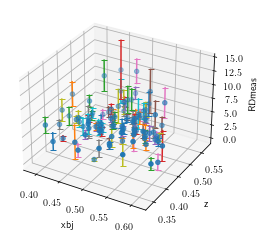

In [13]:
Q2 = 5.5

Q = math.sqrt(Q2)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
xs = []
zs = []
RDs = []

for i,row in df[df['Q2']==Q2].iterrows():
    xbj_corr = row['xbj_corr']
    xs.append(xbj_corr)
    #print(xbj_corr)
    z_corr = row['z_corr']
    zs.append(z_corr)
    RD = row['y_RD']
    RDs.append(RD)
    RD_error = row['error_RD']
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")

def least_squares_3rdQ2(alpha,beta,a,b,gamma):
    least_square = 0
    for i,row in df[df['Q2']==Q2].iterrows():
        Q2corr = row['Q2_corr']
        xbj = row['xbj_corr']
        zhad = row['z_corr']
        RD = row['y_RD']
        RD_err = row['error_RD']
        neg_D2_yield = row['yield_neg']
        pos_D2_yield = row['yield_pos']
        neg_D2_rho = row['yield_neg_rho']
        Qcorr = math.sqrt(Q2corr)
    
        least_square+=((RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF)))**2/(RD_err)**2
    return least_square
   
    
m_3rdQ2 = Minuit(least_squares_3rdQ2,alpha = inits[0],beta = inits[1],a = inits[2],b = inits[3],gamma = inits[4])
m_3rdQ2.limits['gamma'] = (-2, -0.5)
m_3rdQ2.limits['alpha'] = (0,1)
m_3rdQ2.limits['beta'] = (0,2)
#m_3rdQ2.limits['a'] = (-2,0)
#m_3rdQ2.limits['b'] = (0,4)
m_3rdQ2.migrad()
m_3rdQ2.hesse()
print(*m_3rdQ2.values)
print(m_3rdQ2.fval)

alpha = m_3rdQ2.values[0]
print(alpha)

#dfArhoout = pd.DataFrame()
for i,row in df[df['Q2']==Q2].iterrows():
    Q2corr = row['Q2_corr']
    xbj = row['xbj_corr']
    zhad = row['z_corr']
    RD = row['y_RD']
    RD_err = row['error_RD']
    neg_D2_yield = row['yield_neg']
    pos_D2_yield = row['yield_pos']
    neg_D2_rho = row['yield_neg_rho']
    Qcorr = math.sqrt(Q2corr)
    #residual = RD/RD_err
    residual = (RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,m_3rdQ2.values[0],m_3rdQ2.values[1],m_3rdQ2.values[2],m_3rdQ2.values[3],m_3rdQ2.values[4],i_PDF,i_FF))/RD_err
    #(RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF))/RD_err
    #print(residual)
    row['Residual_Arho']=(residual)
    dfArhoout = dfArhoout.append(row)



In [14]:
#dfArhoout[dfArhoout['Q2'] == 5.5].head()
dfArhoout.head()

,Q2,Q2_corr,xbj,xbj_corr,z,z_corr,RunGroup,y_RD,error_RD,y_RD_rho,...,yield_neg_incrad,yield_pos_incnorad,yield_pos_incrad,W2_corr,Wp2_corr,xprime_corr,zprime_corr,shms_p,shms_dp,Residual_Arho
0,4.0,3.37275,0.275,0.278487,0.325,0.344239,100.0,6.56366,2.838890,5.91386,...,22.7048,34.2880,33.6179,9.62358,6.52152,0.273047,0.337436,2.22258,-8.46546,0.235165
1,4.0,3.37644,0.275,0.282134,0.375,0.373989,100.0,4.70246,0.734059,4.38102,...,34.3846,52.8819,51.4773,9.47924,6.17179,0.276137,0.365692,2.38734,-1.68022,-0.901208
2,4.0,3.78996,0.325,0.324579,0.375,0.376585,100.0,6.39900,0.856208,5.96019,...,59.0520,96.2195,93.4342,8.77394,5.71100,0.316565,0.366879,2.34447,-3.44549,1.304752
3,4.0,4.20543,0.375,0.371190,0.375,0.380968,100.0,6.59966,1.179900,6.30057,...,39.8480,67.4365,61.5113,8.01172,5.19479,0.360333,0.369801,2.30069,-5.24857,1.292712
4,4.0,4.59366,0.425,0.418406,0.375,0.386491,100.0,4.00958,1.157810,3.71265,...,13.6858,24.4867,21.2816,7.27139,4.67926,0.404611,0.374031,2.26197,-6.84323,-0.856736


In [15]:
df = df[df['shms_dp']>-9.5]
df = df[df['shms_dp']<24.5]
df.describe()

,Q2,Q2_corr,xbj,xbj_corr,z,z_corr,RunGroup,y_RD,error_RD,y_RD_rho,...,yield_neg_incnorad,yield_neg_incrad,yield_pos_incnorad,yield_pos_incrad,W2_corr,Wp2_corr,xprime_corr,zprime_corr,shms_p,shms_dp
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,...,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,4.695983,4.365610,0.447853,0.448238,0.464197,0.464129,305.373961,5.303059,1.398839,4.666675,...,14.163522,12.560998,22.352193,20.162690,6.295783,3.634493,0.408725,0.424637,2.415687,3.086331
std,0.597034,0.705032,0.074702,0.070072,0.070570,0.066616,141.695826,1.784669,0.986072,1.629527,...,12.163653,10.943056,18.808556,17.208605,0.979570,0.686229,0.104735,0.107810,0.387122,9.622913
min,4.000000,3.072320,0.275000,0.278487,0.325000,0.333986,90.000000,0.061336,0.315576,0.046891,...,0.203569,0.181304,0.317505,0.286971,4.369330,2.825720,-0.000000,-0.000000,1.577690,-8.652160
25%,4.000000,3.844610,0.375000,0.389462,0.425000,0.423315,180.000000,4.178160,0.731127,3.608890,...,5.446780,4.612700,8.630620,7.628540,5.592120,3.067510,0.369711,0.402870,2.128400,-5.581270
50%,4.750000,4.432650,0.425000,0.440975,0.475000,0.470833,290.000000,5.069980,1.060260,4.514390,...,9.548760,8.636500,15.281100,13.680300,6.165530,3.467530,0.415302,0.445708,2.461020,0.198205
75%,5.500000,4.885190,0.525000,0.511514,0.525000,0.519761,440.000000,6.299140,1.687020,5.601330,...,19.304700,16.588000,30.128200,27.229400,6.812270,4.051950,0.459085,0.491660,2.714530,11.275900
max,5.500000,6.060700,0.625000,0.612865,0.675000,0.659579,550.000000,9.892920,6.294660,9.068850,...,64.027800,59.052000,96.219500,93.434200,9.623580,6.521520,0.545935,0.640100,3.762660,24.401200


In [16]:
Qs = []
parameters = []
param_errs = []
kaisquare = []

def least_squares_Q2(alpha,beta,a,b,gamma):
    least_square = 0
    for i,row in df.iterrows():
        Q2corr = row['Q2_corr']
        xbj = row['xbj_corr']
        zhad = row['z_corr']
        RD = row['y_RD']
        RD_err = row['error_RD']
        neg_D2_yield = row['yield_neg']
        pos_D2_yield = row['yield_pos']
        neg_D2_rho = row['yield_neg_rho']
        Qcorr = math.sqrt(Q2corr)
        least_square+=((RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF)))**2/(RD_err)**2
    return least_square
m_Q2 = Minuit(least_squares_Q2,alpha = inits[0],beta = inits[1],a = inits[2],b = inits[3],gamma = inits[4])
#m_Q2.limits['gamma'] = (-1.2, -0.8)
m_Q2.fixed['gamma'] = True
#m_Q2.limits['a'] = (0,3)
#m_Q2.limits['b'] = (-0.5,0.5)
m_Q2.errordef = Minuit.LEAST_SQUARES
m_Q2.migrad()
m_Q2.hesse()
print(*m_Q2.values)
#print(m_Q2.values["a"])
parameters.append(m_Q2.values)
param_errs.append(m_Q2.errors)
#print(m_Q2.values["a"])
print(len(df)) 
#print(m_Q2.values)
#print(m_Q2.errors)
print(m_Q2.fval)
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(df) - m_Q2.nfit}",
]
for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
print(fit_info)
'''

'''
dfrhoallout = pd.DataFrame()
for i,row in df.iterrows():
    Q2corr = row['Q2_corr']
    xbj = row['xbj_corr']
    zhad = row['z_corr']
    RD = row['y_RD']
    RD_err = row['error_RD']
    neg_D2_yield = row['yield_neg']
    pos_D2_yield = row['yield_pos']
    neg_D2_rho = row['yield_neg_rho']
    Qcorr = math.sqrt(Q2corr)
    residual = (RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,m_Q2.values[0],m_Q2.values[1],m_Q2.values[2],m_Q2.values[3],m_Q2.values[4],i_PDF,i_FF))/RD_err
    #(RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF))/RD_err
    #print(residual)
    row['Residual_Arho']=(residual)
    dfrhoallout = dfrhoallout.append(row)


dfrhoallout.to_csv('results/csv_rho_all_out.csv',index = False)



0.28075258241443984 1.1601857890278848 2.7683173213630012 -0.11711629369780113 -1.0
361
576.5314698272563
['$\\chi^2$ / $n_\\mathrm{dof}$ = 576.5 / 357', 'alpha = $0.281 \\pm 0.035$', 'beta = $1.160 \\pm 0.152$', 'a = $2.768 \\pm 0.523$', 'b = $-0.117 \\pm 1.326$', 'gamma = $-1.000 \\pm -0.010$']


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrh

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrh

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrh

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrh

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/775922735.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrh

In [17]:
import json
with open('results/CSVs_2dfit.json') as CSV2d_infile:
    j_CSV2d_out=json.load(CSV2d_infile)
name = i_assumption+'all_param'
param_len = len(parameters[0])
print(param_len)
parametersall = []
for i in range(param_len):
    
    parametersall.append(parameters[0][i])
print(parametersall)

j_CSV2d_out[name] = {'Dzparam':parametersall}
with open('results/CSVs_2dfit.json','w') as CSV2d_outfile:
    json.dump(j_CSV2d_out,CSV2d_outfile,indent = 4)

5
[0.28075258241443984, 1.1601857890278848, 2.7683173213630012, -0.11711629369780113, -1.0]


In [18]:
print(m_Q2.covariance)

┌───────┬─────────────────────────────────────────┐
│       │   alpha    beta       a       b   gamma │
├───────┼─────────────────────────────────────────┤
│ alpha │  0.0012 0.00209 0.00259 -0.0278       0 │
│  beta │ 0.00209  0.0231  0.0109  -0.194       0 │
│     a │ 0.00259  0.0109   0.274   -0.19       0 │
│     b │ -0.0278  -0.194   -0.19    1.76       0 │
│ gamma │       0       0       0       0       0 │
└───────┴─────────────────────────────────────────┘


LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2


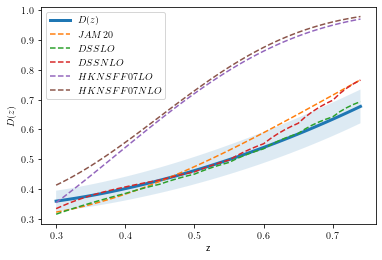

In [19]:
#dont

from iminuit.util import propagate
def Deltaz_param(z_had,params):
    delta_z = z_had**params[0]*(1-z_had)**params[1]
    return delta_z
def D_z_from_deltaz(deltaz,deltaz_err):
    D_z = (1-deltaz)/(1+deltaz)
    D_zerr = (2*deltaz_err)/(1+deltaz)**2
    return D_z,D_zerr
Deltaz_all, Deltacov_all = propagate(lambda p: Deltaz_param(zhad_fit, p), m_Q2.values, m_Q2.covariance)
Deltaz_err_prop_all = np.diag(Deltacov_all)**0.5
D_z_all = D_z_from_deltaz(Deltaz_all,Deltaz_err_prop_all)
plt.plot(zhad_fit,D_z_all[0],lw = 3,label = r"$D(z)$")
plt.fill_between(zhad_fit,D_z_all[0]-D_z_all[1],D_z_all[0]+D_z_all[1],alpha = 0.15)

Q = 2
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_Deltaz = []
DSS_LO = []
DSS_NLO = []
HKNSFF07_LO = []
HKNSFF07_NLO = []
z_axis = np.arange(0.3,0.75,0.01)
for zi in z_axis:
    dup = JAM20.xfxQ(2,zi,Q)
    dum = JAM20.xfxQ(-2,zi,Q)
    #print(dup,' ',dum)
    JAM20_Deltaz.append(dum/dup)
    DSS_LO.append(fDSS_.fdss(1,-1,0,zi,Q*Q)[0]/fDSS_.fdss(1,1,0,zi,4.75)[0])
    DSS_NLO.append(fDSS_.fdss(1,-1,1,zi,Q*Q)[0]/fDSS_.fdss(1,1,1,zi,4.75)[0])
    ff = np.zeros(11)
    grad = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,1,ff,grad)
    ff_minus = np.zeros(11)
    grad_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,2,ff_minus,grad_minus)
    duplus = zi*ff[6]
    duminus = zi*ff_minus[6]
    HKNSFF07_LO.append(duminus/duplus)
    ff_NLO = np.zeros(11)
    grad_NLO = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,1,ff_NLO,grad_NLO)
    ff_NLO_minus = np.zeros(11)
    grad_NLO_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,2,ff_NLO_minus,grad_NLO_minus)
    duplus_NLO = zi*ff_NLO[6]
    duminus_NLO = zi*ff_NLO_minus[6]
    HKNSFF07_NLO.append(duminus_NLO/duplus_NLO)

plt.plot(z_axis,(1-np.asarray(JAM20_Deltaz))/(1+np.asarray(JAM20_Deltaz)),linestyle='dashed',label = r'$JAM20$')
plt.ylabel(r'$D(z)$')
plt.xlabel('z')
plt.plot(z_axis,(1-np.asarray(DSS_LO))/(1+np.asarray(DSS_LO)),linestyle='dashed',label = r'$DSS LO$')
plt.plot(z_axis,(1-np.asarray(DSS_NLO))/(1+np.asarray(DSS_NLO)),linestyle='dashed',label = r'$DSS NLO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_LO))/(1+np.asarray(HKNSFF07_LO)),linestyle='dashed',label = r'$HKNSFF07 LO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_NLO))/(1+np.asarray(HKNSFF07_NLO)),linestyle='dashed',label = r'$HKNSFF07 NLO$')





plt.legend()
plt.savefig("results/Dz_err_7rhoall.pdf")

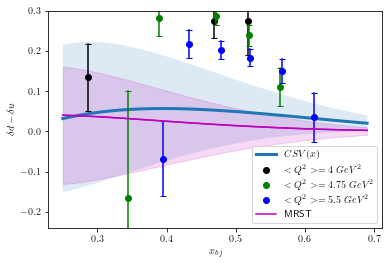

In [20]:
#def CSVx_param(xbj,a,b):
#    #a = -0.5 
#    c = sc.beta(b+2,a+1)/sc.beta(b+1,a+1)
#    CSVx = (1-xbj)**a*xbj**b*(xbj-c)
def CSVx_param(xbj,params):
    a = params[3]
    #a = -0.5
    b = params[2]
    c = sc.beta(a+2,b+1)/sc.beta(a+1,b+1)
    CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-c)
    #CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)
    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    return CSVx
CSVx_all, CSVcov_all = propagate(lambda p: CSVx_param(xbj_fit, p), m_Q2.values, m_Q2.covariance)
plt.plot(xbj_fit,CSVx_all,lw = 3,label = r"$CSV(x)$")
CSVx_err_prop_all = np.diag(CSVcov_all)**0.5
plt.fill_between(xbj_fit,CSVx_all-CSVx_err_prop_all,CSVx_all+CSVx_err_prop_all,alpha = 0.15)

i_assumption_all = "7ass_rhoall_"
with open('results/CSVs_2dfit.json') as CSV2d_infile:
    j_CSV2d_out=json.load(CSV2d_infile)
xbj_ones_plot = j_CSV2d_out[i_assumption_all]["xbj_ones"]
CSV_ones_plot = j_CSV2d_out[i_assumption_all]["CSVs_ones"]
CSV_ones_err_plot = j_CSV2d_out[i_assumption_all]["CSVs_ones_errs"]
xbj_twos_plot = j_CSV2d_out[i_assumption_all]["xbj_twos"]
CSV_twos_plot = j_CSV2d_out[i_assumption_all]["CSVs_twos"]
CSV_twos_err_plot = j_CSV2d_out[i_assumption_all]["CSVs_twos_errs"]
xbj_threes_plot = j_CSV2d_out[i_assumption_all]["xbj_threes"]
CSV_threes_plot = j_CSV2d_out[i_assumption_all]["CSVs_threes"]
CSV_threes_err_plot = j_CSV2d_out[i_assumption_all]["CSVs_threes_errs"]

for i in range(len(CSV_ones_plot)):
    plt.plot([xbj_ones_plot[i],xbj_ones_plot[i]],[CSV_ones_plot[i]-CSV_ones_err_plot[i],CSV_ones_plot[i]+CSV_ones_err_plot[i]],marker = "_",color = "k")
plt.plot(xbj_ones_plot,CSV_ones_plot,"ko",label = r"$<Q^2> = 4\ GeV^2$")
for i in range(len(CSV_twos_plot)):
    plt.plot([xbj_twos_plot[i],xbj_twos_plot[i]],[CSV_twos_plot[i]-CSV_twos_err_plot[i],CSV_twos_plot[i]+CSV_twos_err_plot[i]],marker = "_",color = "g")
plt.plot(xbj_twos_plot,CSV_twos_plot,"go",label = r"$<Q^2> = 4.75\ GeV^2$")
for i in range(len(CSV_threes_plot)):
    plt.plot([xbj_threes_plot[i],xbj_threes_plot[i]],[CSV_threes_plot[i]-CSV_threes_err_plot[i],CSV_threes_plot[i]+CSV_threes_err_plot[i]],marker = "_",color = "b")
plt.plot(xbj_threes_plot,CSV_threes_plot,"bo",label = r"$<Q^2> = 5.5\ GeV^2$")




def delta_udv(parameter):
    x = np.arange(0.25,0.7,0.01)
    return parameter*(1-x)**4*x**-0.5*(x-0.0909)

x_axis = np.arange(0.25,0.7,0.01)
y_delta_uv = delta_udv(-0.2)
y_delta_dv = delta_udv(0.2)
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)
#plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'xCSV')
#plt.plot(x_axis,y_delta_uv_up-y_delta_uv_low,'-.')
#plt.plot(x_axis,y_delta_dv_up-y_delta_dv_low,'--')
plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'm',alpha = 0.15)
plt.legend()
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')

#plt.xlim(0.25,0.7)
plt.ylim(-0.24,0.3)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$\delta d - \delta u$")

plt.savefig("results/CSV_err_7rhoall.pdf")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_74784/3557995684.py:7: RuntimeWarning: divide by zero encountered in power
  CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-c)
/opt/homebrew/lib/python3.9/site-packages/iminuit/util.py:914: RuntimeWarning: invalid value encountered in subtract
  du = (yu - y) / h[i]
/opt/homebrew/lib/python3.9/site-packages/iminuit/util.py:915: RuntimeWarning: invalid value encountered in subtract
  dd = (y - yd) / h[i]


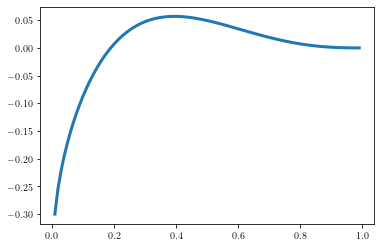

In [21]:
xbj_all = xbj_fit = np.arange(0,1,0.01)
def CSVx_param(xbj,params):
    a = params[3]
    #a = -0.5
    b = params[2]
    c = sc.beta(a+2,b+1)/sc.beta(a+1,b+1)
    CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-c)
    #CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)
    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    return CSVx
CSVx_all, CSVcov_all = propagate(lambda p: CSVx_param(xbj_all, p), m_Q2.values, m_Q2.covariance)
plt.plot(xbj_fit,CSVx_all,lw = 3,label = r"$CSV(x)$")
CSVx_err_prop_all = np.diag(CSVcov_all)**0.5
plt.fill_between(xbj_all,CSVx_all-CSVx_err_prop_all,CSVx_all+CSVx_err_prop_all,alpha = 0.15)

#plt.xlim(0.25,0.75)

In [ ]:
Deltaz_all, Deltacov_all = propagate(lambda p: Deltaz_param(zhad_fit, p), m_Q2.values, m_Q2.covariance)
plt.plot(zhad_fit,Deltaz_all,lw = 3,label = r"$\Delta(z)$")
Deltaz_err_prop_all = np.diag(Deltacov_all)**0.5
plt.fill_between(zhad_fit,Deltaz_all-Deltaz_err_prop_all,Deltaz_all+Deltaz_err_prop_all,alpha = 0.15)

plt.plot(z_axis,np.asarray(JAM20_Deltaz),linestyle='dashed',label = r'$JAM20$')
plt.ylabel(r'$\Delta(z)$')
plt.xlabel('z')
plt.plot(z_axis,np.asarray(DSS_LO),linestyle='dashed',label = r'$DSS LO$')
plt.plot(z_axis,np.asarray(DSS_NLO),linestyle='dashed',label = r'$DSS NLO$')
plt.plot(z_axis,np.asarray(HKNSFF07_LO),linestyle='dashed',label = r'$HKNSFF07 LO$')
plt.plot(z_axis,np.asarray(HKNSFF07_NLO),linestyle='dashed',label = r'$HKNSFF07 NLO$')
plt.legend()
plt.savefig("results/Deltaz_err_7rhoall.pdf")

In [ ]:
#plt.plot(dfrhorhoallout['Q2_corr'],dfrhorhoallout['Residual_Arho'],'bo')
#plt.hist(dfrhorhoallout['Residual_Arho'],50)
plt.scatter(dfrhoallout['Q2_corr'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['Q2_corr'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Q2_corr'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$Q^2$')
plt.legend(title="\n".join(fit_info))
plt.savefig("results/Residual_7assumption_rhoall_Q2.pdf")
#print(len(dfrhoallout['Residual_Arho']))
fig,ax = plt.subplots() 
plt.hist(dfrhoallout['Residual_Arho'],50)
plt.xlabel('residual for rhoall')
plt.legend(title="\n".join(fit_info))
plt.savefig("results/Residual_7assumption_rhoall.pdf")
fig,ax = plt.subplots() 
plt.hist(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],50)
plt.xlabel('residual for outliers')
fig,ax = plt.subplots() 
plt.hist(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],20)
plt.xlabel('error bars for the outliers')
fig,ax = plt.subplots() 
plt.hist(dfrhoallout[dfrhoallout['Residual_Arho']>-1]['error_RD'],20)
plt.xlabel('error bars for good Residual Arho')

In [ ]:
plt.scatter(dfrhoallout['xbj_corr'],dfrhoallout['Residual_Arho'])
plt.errorbar(dfrhoallout['xbj_corr'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['xbj_corr'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$xbj$')
plt.savefig("results/Residual_7assumption_rhoall_xbj.pdf")

In [ ]:
plt.scatter(dfrhoallout['z_corr'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['z_corr'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['z_corr'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$z$')
plt.savefig("results/Residual_7assumption_rhoall_z.pdf")

In [ ]:
plt.scatter(dfrhoallout['W2_corr'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['W2_corr'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['W2_corr'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$W^2$')
plt.savefig("results/Residual_7assumption_rhoall_W2.pdf")

In [ ]:
plt.scatter(dfrhoallout['Wp2_corr'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['Wp2_corr'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Wp2_corr'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$Wp^2$')
plt.savefig("results/Residual_7assumption_rhoall_Wp2.pdf")

In [ ]:
plt.scatter(dfrhoallout['shms_p'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['shms_p'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['shms_p'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$shmsp$')
plt.savefig("results/Residual_7assumption_rhoall_shms_p.pdf")

In [ ]:
plt.scatter(dfrhoallout['shms_dp'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['shms_dp'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['shms_dp'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$shmsdp$')
plt.savefig("results/Residual_7assumption_rhoall_shms_dp.pdf")

In [ ]:
import scipy.integrate as integrate
print(integrate.quad(CSVx_param,0,1,parameters[0]))



In [ ]:
a = parameters[0][3]
b = parameters[0][2]
c = sc.beta(a+2,b+1)/sc.beta(a+1,b+1)
print(c)